In [1]:
import os
import zipfile

local_zip = 'armas.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('tmp')
zip_ref.close()

In [2]:
base_dir = 'tmp/armas'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directorio con nuestras armas de entrenamiento 
train_escopeta_dir = os.path.join(train_dir, 'escopeta')
train_guns_dir = os.path.join(train_dir, 'guns')

# Directorio con nuestras armas de validacion 
validation_escopeta_dir = os.path.join(validation_dir, 'escopeta')
validation_guns_dir = os.path.join(validation_dir, 'guns')

In [3]:
train_escopeta_fnames = os.listdir( train_escopeta_dir )
train_guns_fnames = os.listdir( train_guns_dir )

validation_escopeta_fnames = os.listdir( validation_escopeta_dir )
validation_guns_fnames = os.listdir( validation_guns_dir )

print("Nombre de los archivos de imágenes para entrenamiento...")
print(train_escopeta_fnames[:10])
print(train_guns_fnames[:10])
print("Nombre de los archivos de imágenes para validación...")
print(validation_escopeta_fnames[:10])
print(validation_guns_fnames[:10])


Nombre de los archivos de imágenes para entrenamiento...
['esco1.jpg', 'esco10.jpg', 'esco11.jpg', 'esco12.jpg', 'esco13.jpg', 'esco14.jpg', 'esco15.jpg', 'esco16.jpg', 'esco17.jpg', 'esco18.jpg']
['gun1.png', 'gun10.jpg', 'gun10Flip.jpg', 'gun11Flip.jpg', 'gun12Flip.jpg', 'gun13Flip.jpg', 'gun14Flip.jpg', 'gun15Flip.jpg', 'gun16Flip.jpg', 'gun17Flip.jpg']
Nombre de los archivos de imágenes para validación...
['escopeta1.jpg', 'escopeta2.jpg', 'escopeta3.jpg', 'escopeta4.jpg', 'escopeta5.jpg', 'escopeta6.jpg', 'escopeta7.jpg', 'escopeta8.jpg']
['pistola1.jpg', 'pistola2.jpg', 'pistola3.jpg', 'pistola4.jpg', 'pistola5.jpg', 'pistola6.jpg', 'pistola7.jpg', 'pistola8.jpg']


In [4]:
print('total training escopeta images :', len(os.listdir(train_escopeta_dir ) ))
print('total training guns images :', len(os.listdir(train_guns_dir ) ))

print('total validation escopeta images :', len(os.listdir( validation_escopeta_dir ) ))
print('total validation guns images :', len(os.listdir( validation_guns_dir ) ))

total training escopeta images : 20
total training guns images : 34
total validation escopeta images : 8
total validation guns images : 8


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

M O S T R A N D O  U N  S U B C O N J U N T O  D E  L A S  I M Á G E N E S  P A R A  E N T R E N A M I E N T O


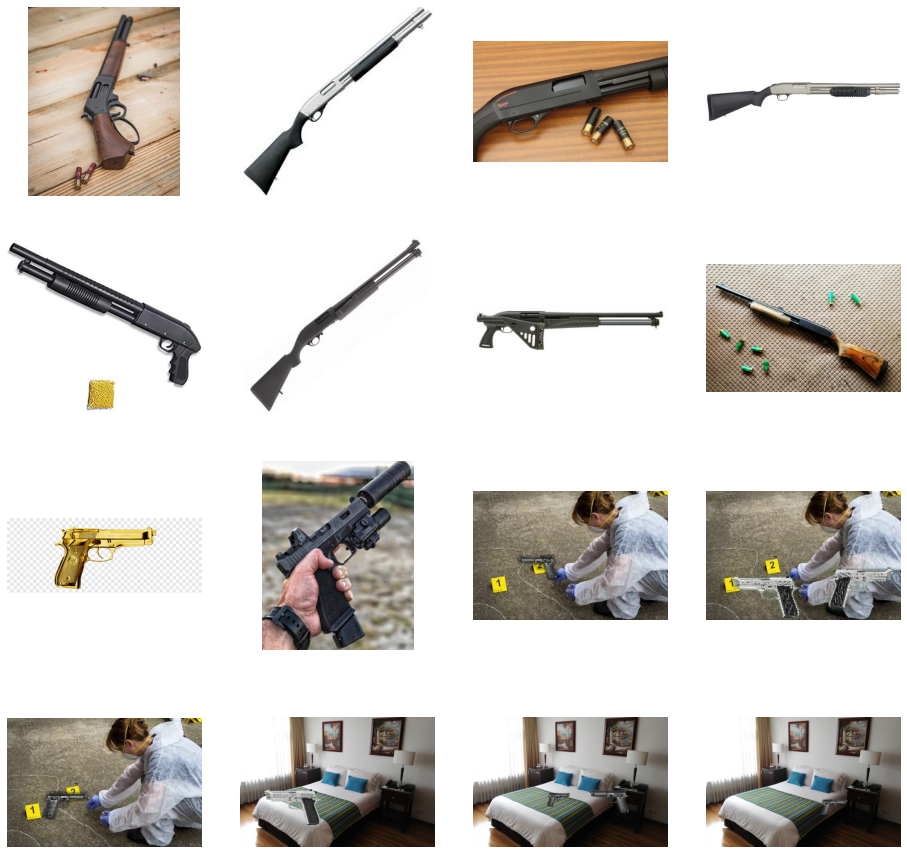

M O S T R A N D O   U N   S U B C O N J U N T O   D E   L A S   I M Á G E N E S   P A R A   V A L I D A C I Ó N


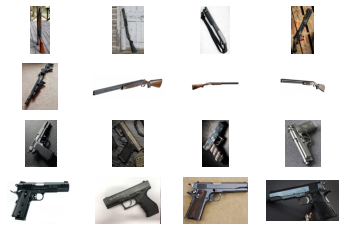

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8  

next_escopeta_pix = [os.path.join(train_escopeta_dir, fname) 
                for fname in train_escopeta_fnames[ pic_index-8:pic_index] 
               ]

next_guns_pix = [os.path.join(train_guns_dir, fname) 
                for fname in train_guns_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

print("M O S T R A N D O  U N  S U B C O N J U N T O  D E  L A S  I M Á G E N E S  P A R A  E N T R E N A M I E N T O")
plt.show() 


next_escopeta_pix = [os.path.join(validation_escopeta_dir, fname) 
                for fname in validation_escopeta_fnames[ pic_index-8:pic_index] 
               ]

next_guns_pix = [os.path.join(validation_guns_dir, fname) 
                for fname in validation_guns_fnames[ pic_index-8:pic_index]
               ]


for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
print("M O S T R A N D O   U N   S U B C O N J U N T O   D E   L A S   I M Á G E N E S   P A R A   V A L I D A C I Ó N")
plt.show()

In [7]:
import tensorflow as tf

In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('escopeta') and 1 for the other ('guns')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 54 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [15]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=2,
                              epochs=15,
                              validation_steps=5,
                              verbose=2)

Epoch 1/15
2/2 - 1s - loss: 3.5722 - accuracy: 0.6250 - val_loss: 4.3342 - val_accuracy: 0.5000
Epoch 2/15
2/2 - 1s - loss: 2.7043 - accuracy: 0.4250
Epoch 3/15
2/2 - 0s - loss: 0.7766 - accuracy: 0.5588
Epoch 4/15
2/2 - 0s - loss: 0.5896 - accuracy: 0.7647
Epoch 5/15
2/2 - 0s - loss: 0.7185 - accuracy: 0.7250
Epoch 6/15
2/2 - 0s - loss: 0.6791 - accuracy: 0.5000
Epoch 7/15
2/2 - 0s - loss: 0.3836 - accuracy: 0.8750
Epoch 8/15
2/2 - 0s - loss: 1.1166 - accuracy: 0.7000
Epoch 9/15
2/2 - 0s - loss: 0.6878 - accuracy: 0.6765
Epoch 10/15
2/2 - 0s - loss: 0.4127 - accuracy: 0.7941
Epoch 11/15
2/2 - 0s - loss: 0.3538 - accuracy: 0.8235
Epoch 12/15
2/2 - 1s - loss: 0.1882 - accuracy: 0.9706
Epoch 13/15
2/2 - 0s - loss: 0.1974 - accuracy: 0.9118
Epoch 14/15
2/2 - 0s - loss: 0.1643 - accuracy: 0.9250
Epoch 15/15
2/2 - 0s - loss: 0.0984 - accuracy: 1.0000


In [16]:
import numpy as np

from keras.preprocessing import image

for i, img_path in enumerate(next_escopeta_pix+next_guns_pix):

  # predicting images
  img=image.load_img(img_path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(img_path + " es una escopeta")
    
  else:
    print(img_path + " es una pistola")

[1.]
tmp/armas\validation\escopeta\escopeta1.jpg es una escopeta
[0.]
tmp/armas\validation\escopeta\escopeta2.jpg es una pistola
[0.]
tmp/armas\validation\escopeta\escopeta3.jpg es una pistola
[1.]
tmp/armas\validation\escopeta\escopeta4.jpg es una escopeta
[0.]
tmp/armas\validation\escopeta\escopeta5.jpg es una pistola
[0.]
tmp/armas\validation\escopeta\escopeta6.jpg es una pistola
[0.]
tmp/armas\validation\escopeta\escopeta7.jpg es una pistola
[0.]
tmp/armas\validation\escopeta\escopeta8.jpg es una pistola
[1.]
tmp/armas\validation\guns\pistola1.jpg es una escopeta
[0.]
tmp/armas\validation\guns\pistola2.jpg es una pistola
[0.]
tmp/armas\validation\guns\pistola3.jpg es una pistola
[0.]
tmp/armas\validation\guns\pistola4.jpg es una pistola
[0.]
tmp/armas\validation\guns\pistola5.jpg es una pistola
[0.]
tmp/armas\validation\guns\pistola6.jpg es una pistola
[0.]
tmp/armas\validation\guns\pistola7.jpg es una pistola
[1.]
tmp/armas\validation\guns\pistola8.jpg es una escopeta


<ipython-input-17-0bcb336dffde>:55: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


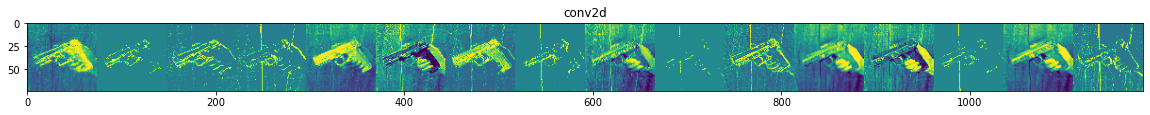

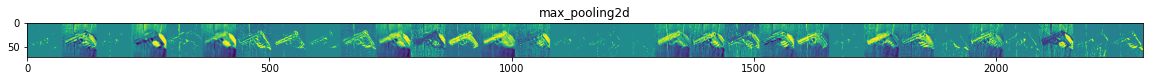

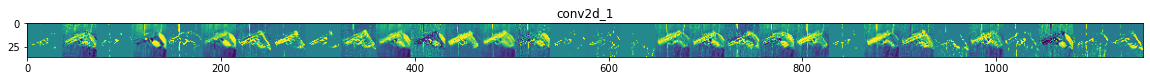

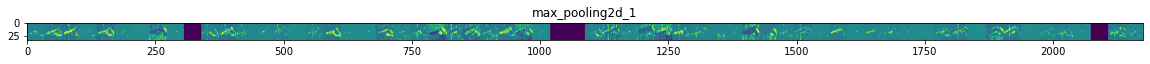

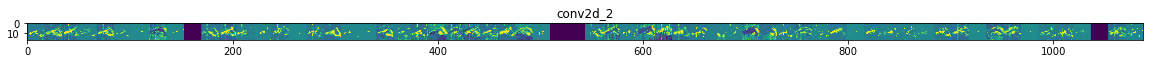

In [17]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a escopeta or guns from the training set.
escopeta_img_files = [os.path.join(train_escopeta_dir, f) for f in train_escopeta_fnames]
guns_img_files = [os.path.join(train_guns_dir, f) for f in train_guns_fnames]

img_path = random.choice(escopeta_img_files + guns_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

ValueError: x and y must have same first dimension, but have shapes (15,) and (1,)

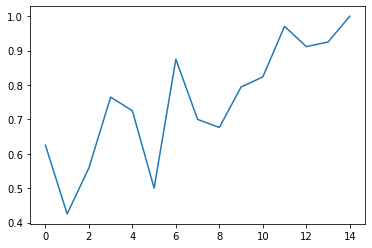

In [18]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )